Importação das bibliotecas necessárias

In [352]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import numpy as np

Criação e visualização do dataframe original a partir da base de teste (test.csv)

In [353]:
df_train = pd.read_csv('train.csv', sep=',')
df_test = pd.read_csv('test.csv', sep=',')

df_train.info()

df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Retirando a coluna "Cabin", pois tem muitos valores faltantes e, ao meu ver, pode ser descartada

In [354]:
df_train.drop(['Cabin'], axis=1, inplace=True)
df_test.drop(['Cabin'], axis=1, inplace=True)

Observando possíveis correlações entre a sobrevivência e as features.

Sobrevivência vs. sexo

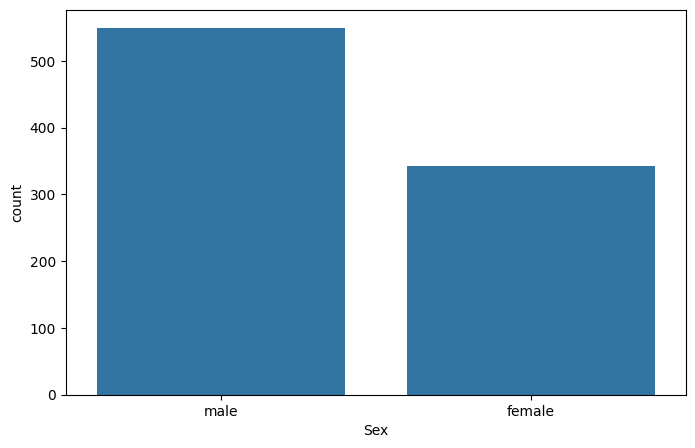

In [355]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y=(df_train['Survived'].value_counts()), data=df_train)
plt.show()

Acima vimos que muito mais homens do que mulheres sobreviveram ao desastre. No entanto, seria mais relevante saber o percentual de cada um destes que sobreviveu, pois poderia realmente ter muito mais homens do que mulheres no navio.

1.0


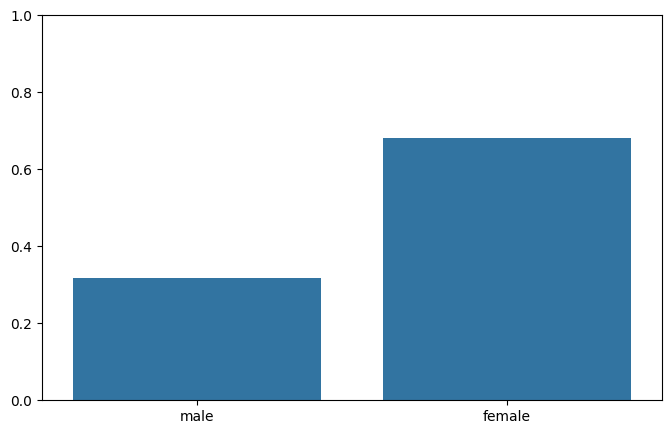

In [356]:
homens_sobreviventes = (df_train[(df_train['Sex'] == 'male') & (df_train['Survived'] == 1)].shape[0])/(df_train['Survived'] == 1).sum()
mulheres_sobreviventes = (df_train[(df_train['Sex'] == 'female') & (df_train['Survived'] == 1)].shape[0])/(df_train['Survived'] == 1).sum()

print(homens_sobreviventes + mulheres_sobreviventes)

plt.figure(figsize=(8, 5))
sns.barplot(x=['male', 'female'], y=(homens_sobreviventes, mulheres_sobreviventes))
plt.ylim(0,1)
plt.show()

#Aqui vemos que, apesar do número absoluto de sobreviventes homens ser muito maior, o percentual de mulheres sobreviventes é muito maior do que o de homens, indicando que essa feature pode ser útil no modelo

Sobrevivência vs. classe

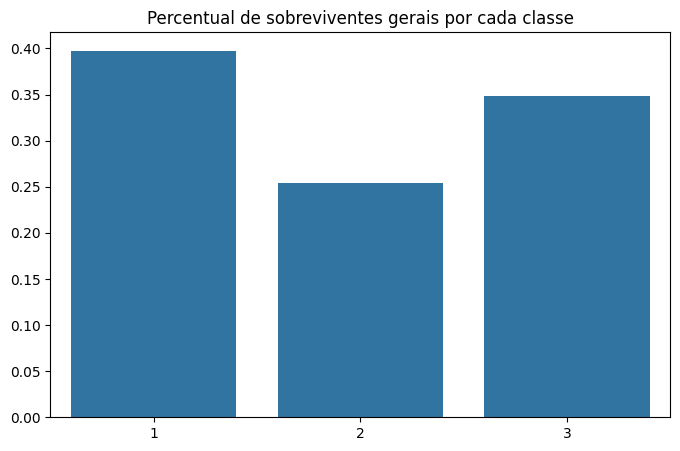

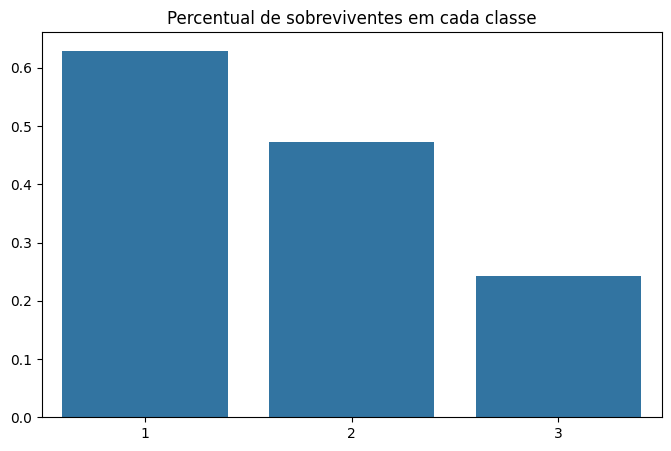

In [357]:
sobreviventes_1 = (df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)].shape[0])/(df_train['Survived'] == 1).sum()
sobreviventes_2 = (df_train[(df_train['Pclass'] == 2) & (df_train['Survived'] == 1)].shape[0])/(df_train['Survived'] == 1).sum()
sobreviventes_3 = (df_train[(df_train['Pclass'] == 3) & (df_train['Survived'] == 1)].shape[0])/(df_train['Survived'] == 1).sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=['1', '2', '3'], y=(sobreviventes_1, sobreviventes_2, sobreviventes_3))
plt.title('Percentual de sobreviventes gerais por cada classe')
plt.show()

#Aqui vemos que, percentualmente, a maioria dos sobreviventes são da primeira classe. No entanto, chama atenção a terceira classe ter mais sobreviventes do que a segunda (percentualmente).

sobreviventes_1_rel = (df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)].shape[0])/(df_train['Pclass'] == 1).sum()
sobreviventes_2_rel = (df_train[(df_train['Pclass'] == 2) & (df_train['Survived'] == 1)].shape[0])/(df_train['Pclass'] == 2).sum()
sobreviventes_3_rel = (df_train[(df_train['Pclass'] == 3) & (df_train['Survived'] == 1)].shape[0])/(df_train['Pclass'] == 3).sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=['1', '2', '3'], y=(sobreviventes_1_rel, sobreviventes_2_rel, sobreviventes_3_rel))
plt.title('Percentual de sobreviventes em cada classe')
plt.show()

#Aqui a observação é que a taxa de sobrevivência dos passageiros da primeira classe foi maior, seguido pela segunda e terceira classes. Isto indica que, quando mais cara é a classe, maior a chance do passageiro sobreviver

Sobrevivência vs. idade

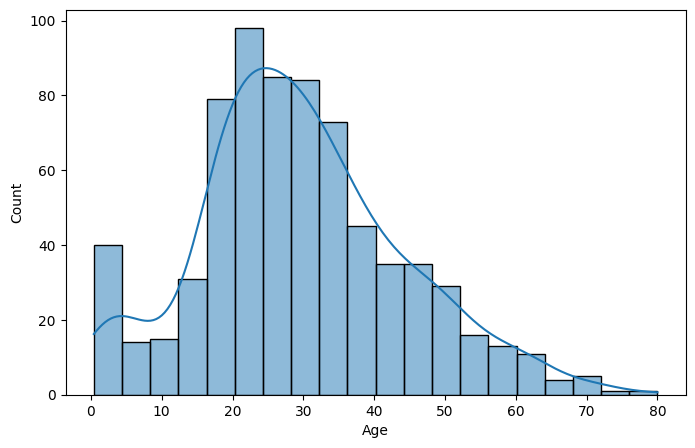

In [358]:
#analisando a distribuição de frequência das idades

plt.figure(figsize=(8, 5))
sns.histplot(df_train['Age'], kde=True)
plt.show()

#Substituir os valores faltantes da coluna 'Age' com a média ou mediana distorceu muito a distribuição de frequência. Por isso, as linhas sem a idade foram retiradas do modelo, pois esta variável foi considerada importante. 
# 
# Foi feito um teste de submissão do modelo retirando as linhas sem idade e outro preenchendo com o valor da média de idades. O primeiro caso resultou em um modelo mais preciso.

df_train.dropna(subset=['Age'], inplace=True)


Sobrevivência vs. Sibsp (famíia: irmão, meio-irmão, marido e esposa)

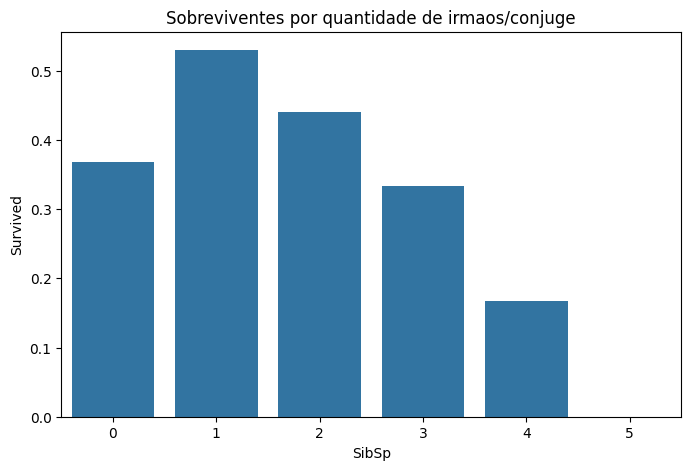

In [369]:
plt.figure(figsize=(8, 5))
sns.barplot(x='SibSp', y='Survived', data=df_train, errorbar=None)
plt.title('Sobreviventes por quantidade de irmaos/conjuge')
plt.show()

#O gráfico indica que, quanto maior a quantidade de irmãos e conjuges, menor a chance de sobreviver

Acredito que essa coluna (Parch) não seja tão relevante para o modelo, pois já temos a coluna de siblings, que já é um indicador de familiares.

In [360]:
df_train.drop(['Parch'], axis=1, inplace=True)
df_test.drop(['Parch'], axis=1, inplace=True)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,S


Analisando ticket

In [361]:
df_train.Ticket.value_counts()

#Ao que parece, o dígito inicial do ticket representa a classe (1,2 ou 3). Como já temos essa informação, a coluna será retirada.

df_train.drop(['Ticket'], axis=1, inplace=True)
df_test.drop(['Ticket'], axis=1, inplace=True)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,8.0500,S


Sobrevivência vs. Fare

94 linhas removidas


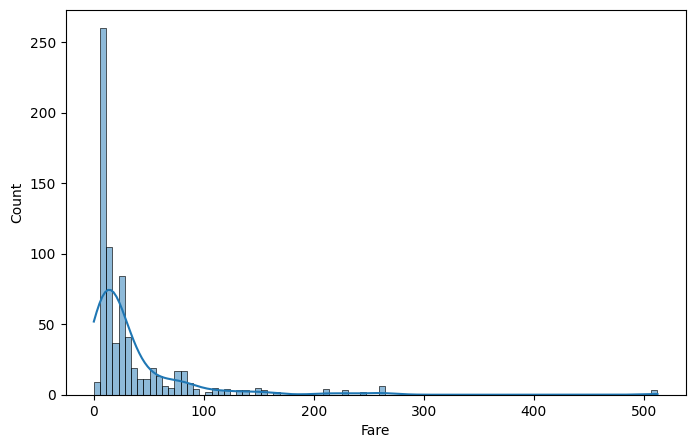

In [362]:
####################### FUNÇÃO PARA EXCLUIR OUTLIER SEGUNDO IQR #######################################

def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df,  linhas_removidas

#######################################################################################################

df, linhas_removidas = excluir_outliers(df_train, 'Fare')
print('{} linhas removidas'.format(linhas_removidas))

plt.figure(figsize=(8, 5))
sns.histplot(x=df_train['Fare'], kde=True)
plt.show()

Sobrevivência vs. Embarked

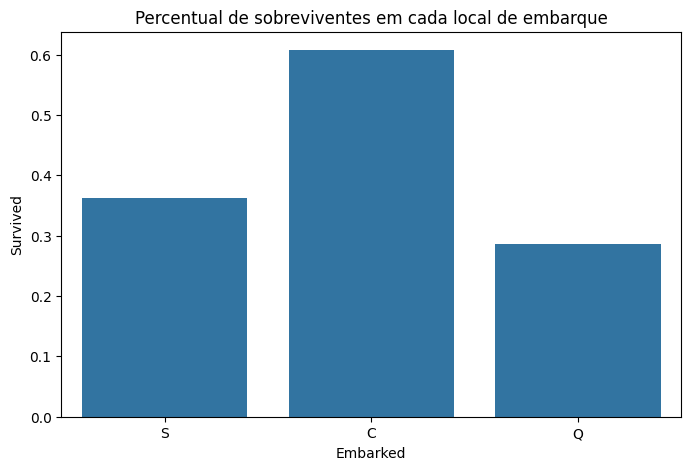

In [370]:
df_train.dropna(subset=['Embarked'], inplace=True)
plt.figure(figsize=(8, 5))
sns.barplot(x='Embarked', y='Survived', data=df_train, errorbar=None)
plt.title('Percentual de sobreviventes em cada local de embarque')
plt.show()

ENCODING

In [364]:
#O nome do passageiro não será utilzado.

df_train.drop(['Name'], axis=1, inplace=True)
df_test.drop(['Name'], axis=1, inplace=True)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   Embarked     712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


Criando um dataframe com encoding para cada uma das colunas não-numéricas que serão usadas no modelo. O encoding também é aplicado ao mesmo tempo na base de dados de teste.

In [365]:
df_encoding = df_train.copy()

df_encoding['Sex'] = df_encoding['Sex'].map({'male': 0, 'female': 1})
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

df_encoding['Embarked'] = df_encoding['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df_test['Embarked'] = df_test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    int64  
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   Embarked     712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.1 KB


In [366]:
X_train = df_encoding[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']]
Y_train = df_encoding['Survived']

#lista com os modelos que foram testados
modelos_teste = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB()
]
y_previsto = []
for modelo in modelos_teste:
    modelo.fit(X_train, Y_train)
    y_pred = modelo.predict(X_train)
    print(f'{modelo.__class__.__name__}: {accuracy_score(Y_train, y_pred):.4f}')

#o modelo de random forest apresentou o melhor resultado e será o escolhido.

LogisticRegression: 0.8006
DecisionTreeClassifier: 0.9860
RandomForestClassifier: 0.9860
GradientBoostingClassifier: 0.9073
SVC: 0.6770
KNeighborsClassifier: 0.7921
GaussianNB: 0.7837


Modelo escolhido: Random Forest. Aplicando o modelo na base de teste e gerando o arquivo csv para submissão.

In [367]:
X_test = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']]

modelo = RandomForestClassifier()
modelo.fit(X_train, Y_train)

y_pred = modelo.predict(X_test)

submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred})

submission.to_csv('submission_pvincius.csv', index=False)